# Rutherford scattering

Fit the data using a logistical map.

Learning to read from data files.


In [48]:
import numpy as np
import matplotlib.pyplot as plt
hconf = dict(histtype='stepfilled', alpha=0.75 , ec="k")
plt.rcParams['font.size'] = 18

def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y


# Run 1, 
Phis_run1, Thetas_run1 = Read_Two_Column_File('run1.dat')
Phis_run2, Thetas_run2 = Read_Two_Column_File('run2.dat')
Phis_run3, Thetas_run3 = Read_Two_Column_File('run3.dat')

In [49]:
print(Phis_run1[0:10]) 
print(Thetas_run1[0:10])
print(Phis_run2[0:10]) 
print(Thetas_run2[0:10])
print(Phis_run3[0:10]) 
print(Thetas_run3[0:10])

[1.121434462198758, 1.9439034254406986, 0.33531035193356634, -1.0554011227387605, 0.9443225631353813, 2.5004514663350417, 0.4868669789688721, 1.7990190792338192, 1.5720809003843548, -1.1728463457206817]
[0.2650609786924345, 0.387164692788121, 0.255455523158022, 0.219592029128264, 0.2013357684306275, 0.3238761693172163, 0.7607977768560023, 0.2490728928865648, 0.22210544666411566, 0.279441727625314]
[0.9570691889592917, 2.1012910594486143, -1.6015531888825243, -2.3788708657159012, -1.4479505785227036, -1.1577634474065392, -1.6861893888416926, -1.0175473093212606, 1.1990120926429535, -2.0424462295667416]
[0.05614894601064323, 0.06955316032148422, 0.06456333800932994, 0.1336406560195177, 0.06288859614321357, 0.18475013320619785, 0.12028250230450946, 0.06214862343207242, 0.06577172287693983, 0.9117871324417333]
[-2.994383472902364, 0.1495956068412226, -0.12911666737032662, -0.6004692260860376, -0.20902329949137935, 2.901314229611349, 2.120453648243913, 2.491796470315418, 2.592389157619534, 

Let's plot the $\theta$ distribution:


Text(0, 0.5, 'Counts')

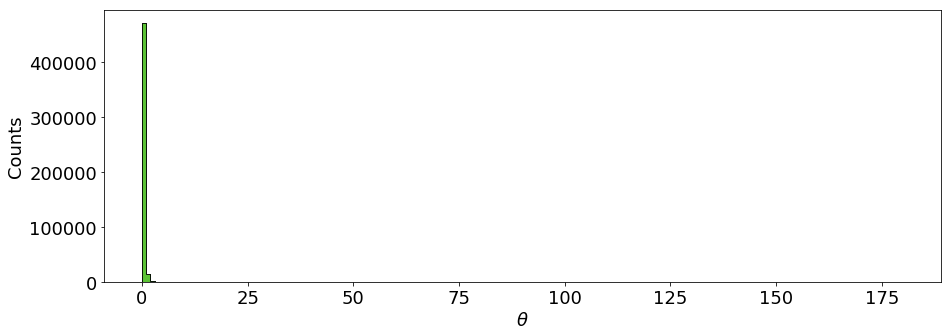

In [50]:
fig = plt.figure(figsize=(15,5))
h_ThetaRun1, binArray, na =  plt.hist(Thetas_run1, 180, range=[0., 180.], label='E = 7.75 MeV', color='dodgerblue', **hconf)
h_ThetaRun2, binArray, na =  plt.hist(Thetas_run1, 180, range=[0., 180.], label='E = 28.2 MeV', color='orange', **hconf)
h_ThetaRun3, binArray, na =  plt.hist(Thetas_run1, 180, range=[0., 180.], label='E = 46.6 MeV', color='limegreen', **hconf)
plt.xlabel(r"$\theta$")
plt.ylabel(r'Counts')

Oh no that's not okay... Let's draw again with a logarithmic y axis:


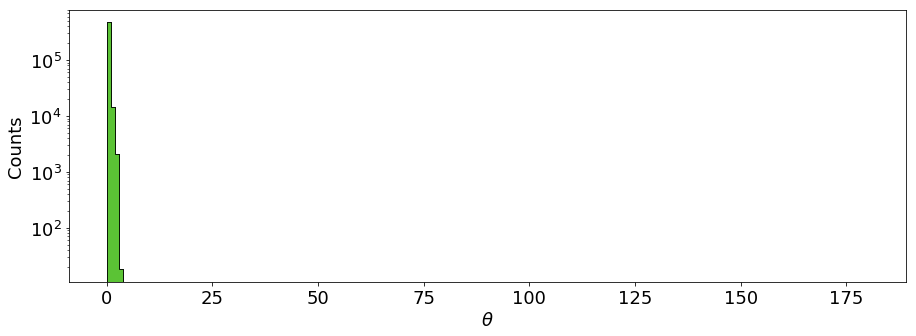

In [51]:
fig = plt.figure(figsize=(15,5))
h_ThetaRun1, binArray, na =  plt.hist(Thetas_run1, 180, range=[0., 180.], label='E = 7.75 MeV', color='dodgerblue', **hconf)
h_ThetaRun2, binArray, na =  plt.hist(Thetas_run1, 180, range=[0., 180.], label='E = 28.2 MeV', color='orange', **hconf)
h_ThetaRun3, binArray, na =  plt.hist(Thetas_run1, 180, range=[0., 180.], label='E = 46.6 MeV', color='limegreen', **hconf)
plt.xlabel(r'$\theta$')
plt.ylabel(r'Counts')
plt.yscale('log')

Mmmm let's just select the points that are backscattered, when $\theta >$ 90$^\circ$

487952
500000
500000
4989
3.120721756594715


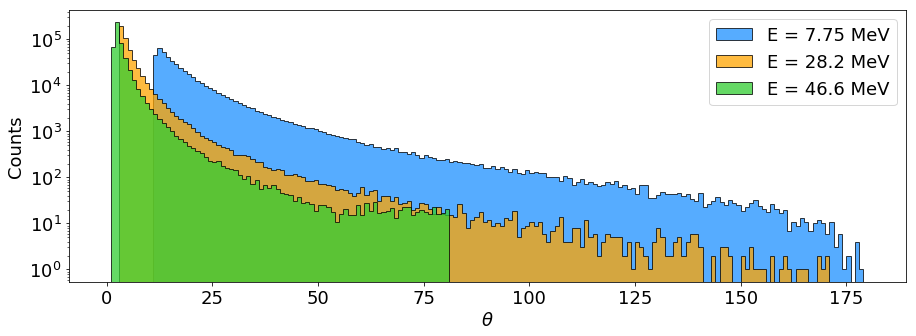

In [56]:
def convertInDegrees(list_angles_radian_to_convert):

    outlist = []
    for theta in list_angles_radian_to_convert:
        outlist.append(np.rad2deg(theta))
    return outlist
    
def extractBackScatters(list_theta_in_degree):
    outlist = []
    for theta in list_theta_in_degree:
        if theta > 90:
            outlist.append(theta)
    return outlist 

ThetasD_run1 = convertInDegrees(Thetas_run1)
ThetasD_run2 = convertInDegrees(Thetas_run2)
ThetasD_run3 = convertInDegrees(Thetas_run3)

BackScatThetas_run1 = extractBackScatters(ThetasD_run1)
BackScatThetas_run2 = extractBackScatters(ThetasD_run2)
BackScatThetas_run3 = extractBackScatters(ThetasD_run3)

fig = plt.figure(figsize=(15,5))
h_ThetaRun1, binArray, na =  plt.hist(ThetasD_run1, 180, range=[0., 180.], label='E = 7.75 MeV', color='dodgerblue', **hconf)
h_ThetaRun2, binArray, na =  plt.hist(ThetasD_run2, 180, range=[0., 180.], label='E = 28.2 MeV', color='orange', **hconf)
h_ThetaRun3, binArray, na =  plt.hist(ThetasD_run3, 180, range=[0., 180.], label='E = 46.6 MeV', color='limegreen', **hconf)
plt.xlabel(r'$\theta$')
plt.ylabel(r'Counts')
plt.legend()
plt.yscale('log')

print(len(Thetas_run1))
print(len(Thetas_run2))
print(len(Thetas_run3))

print(len(BackScatThetas_run1))
print(max(Thetas_run1))


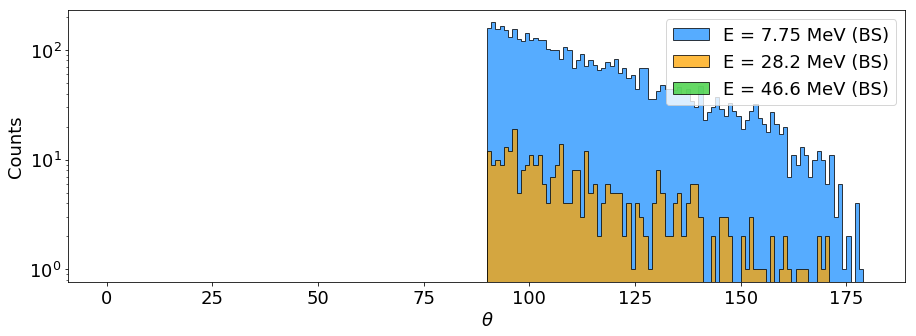

In [53]:
# Back scattered:
fig = plt.figure(figsize=(15,5))
h_ThetaRun1, binArray, na =  plt.hist(BackScatThetas_run1, 180, range=[0., 180.], label='E = 7.75 MeV (BS)', color='dodgerblue', **hconf)
h_ThetaRun2, binArray, na =  plt.hist(BackScatThetas_run2, 180, range=[0., 180.], label='E = 28.2 MeV (BS)', color='orange', **hconf)
h_ThetaRun3, binArray, na =  plt.hist(BackScatThetas_run3, 180, range=[0., 180.], label='E = 46.6 MeV (BS)', color='limegreen', **hconf)
plt.xlabel(r'$\theta$')
plt.ylabel(r'Counts')
plt.legend()
plt.yscale('log')

Rutherford formula: 
    
\begin{equation}
    N(\theta) = \frac{N \, n \, Z^2 \, k^2 \, e^4}{4 r^2 \, KE^2, sin^2 (\theta/2) }
\end{equation}

Constant is 
\begin{equation}
C = \frac{N \, n \, Z^2 \, k^2 \, e^4}{4 r^2 }
\end{equation}

C $\sim$ 5e5 * 

In [65]:
def Rutherford_formula( constant, KE, theta):
    
    return constant * (1./ ( KE**2 ) * ( np.sin(np.deg2rad(theta))**4 )) 

I need help to find this constant.
Let's pick a point on the curve... 



[4.4044044  4.44444444 4.48448448 4.52452452 4.56456456 4.6046046
 4.64464464 4.68468468 4.72472472 4.76476476]


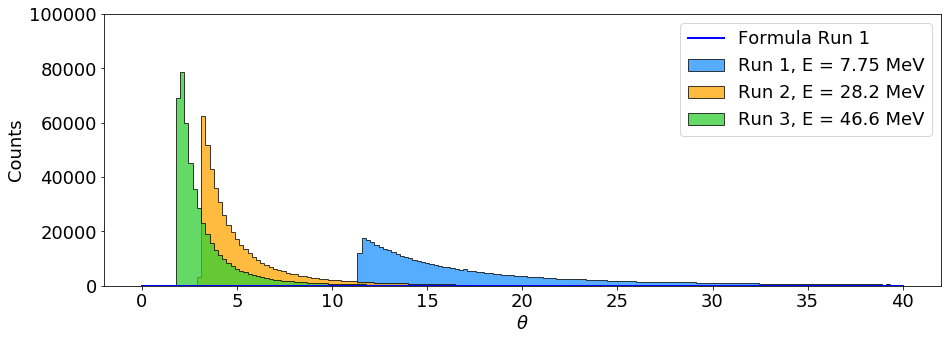

In [69]:
tryCoeff = 30 

minT=0.
maxT=40.

fig = plt.figure(figsize=(15,5))
h_ThetaRun1, binArray, na =  plt.hist(ThetasD_run1, 180, range=[minT, maxT], label='Run 1, E = 7.75 MeV', color='dodgerblue', **hconf)
h_ThetaRun2, binArray, na =  plt.hist(ThetasD_run2, 180, range=[minT, maxT], label='Run 2, E = 28.2 MeV', color='orange', **hconf)
h_ThetaRun3, binArray, na =  plt.hist(ThetasD_run3, 180, range=[minT, maxT], label='Run 3, E = 46.6 MeV', color='limegreen', **hconf)
xi = np.linspace(minT, maxT,1000)
print(xi[110:120])
plt.plot(xi, Rutherford_formula(tryCoeff, 7.75, xi),  label='Formula Run 1', color="b", lw=2 )
plt.xlabel(r'$\theta$')
plt.ylabel(r'Counts')
#plt.yscale('log')
plt.ylim(0, 100000)
plt.legend()

    

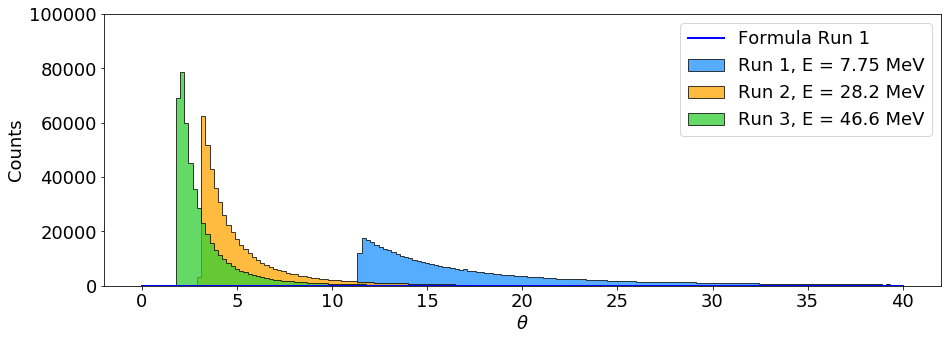

In [66]:
tryCoeff = 130

minT=0.
maxT=40.

fig = plt.figure(figsize=(15,5))
h_ThetaRun1, binArray, na =  plt.hist(ThetasD_run1, 180, range=[minT, maxT], label='Run 1, E = 7.75 MeV', color='dodgerblue', **hconf)
h_ThetaRun2, binArray, na =  plt.hist(ThetasD_run2, 180, range=[minT, maxT], label='Run 2, E = 28.2 MeV', color='orange', **hconf)
h_ThetaRun3, binArray, na =  plt.hist(ThetasD_run3, 180, range=[minT, maxT], label='Run 3, E = 46.6 MeV', color='limegreen', **hconf)
xi = np.linspace(minT, maxT,1000)
plt.plot(xi, Rutherford_formula(tryCoeff, 7.75, xi),  label='Formula Run 1', color="b", lw=2 )
plt.xlabel(r'$\theta$')
plt.ylabel(r'Counts')
#plt.yscale('log')
plt.ylim(0, 100000)
plt.legend()


On the blue curve: 
 * \$theta$ is around 12
 * KE = 7.75 MeV
 * Counts: 18000 